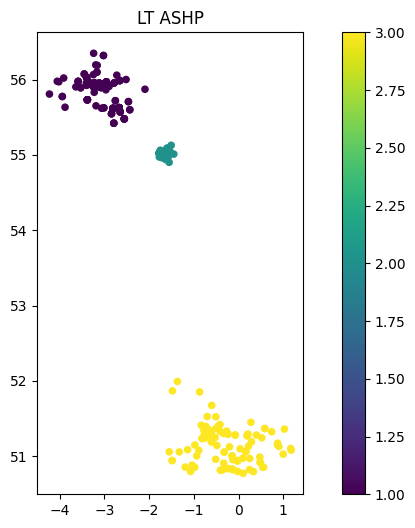

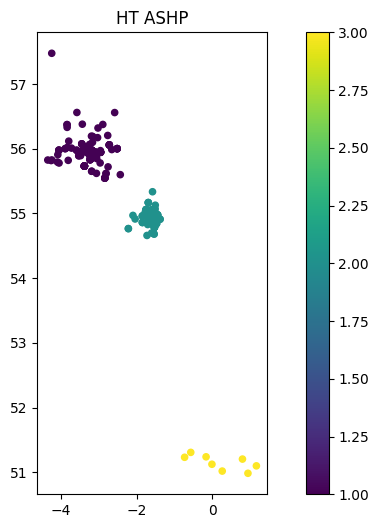

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

#Generates the geo distribution plots

# Load dataset the path where the modified all_summary.csv file is located 
all_summary = ...

# Count clusters
number_scotland = (all_summary['clusters'] == 1).sum()
number_london = (all_summary['clusters'] == 3).sum()
number_tyne = (all_summary['clusters'] == 2).sum()

# Count heat pump installations
number_LT_ASHP = (all_summary['HP_Installed'] == "ASHP").sum()
number_HT_ASHP = (all_summary['HP_Installed'] == "HT_ASHP").sum()

# Filter datasets
all_summary_LT_ASHP = all_summary[all_summary['HP_Installed'] == "ASHP"]
all_summary_HT_ASHP = all_summary[all_summary['HP_Installed'] == "HT_ASHP"]

# Count clusters within filtered data
number_scotland_LT_ASHP = (all_summary_LT_ASHP['clusters'] == 1).sum()
number_london_LT_ASHP = (all_summary_LT_ASHP['clusters'] == 3).sum()
number_tyne_LT_ASHP = (all_summary_LT_ASHP['clusters'] == 2).sum()

number_scotland_HT_ASHP = (all_summary_HT_ASHP['clusters'] == 1).sum()
number_london_HT_ASHP = (all_summary_HT_ASHP['clusters'] == 3).sum()
number_tyne_HT_ASHP = (all_summary_HT_ASHP['clusters'] == 2).sum()

# Create geospatial plots
def plot_geodata(df, title):
    geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
    geo_df = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
    
    fig, ax = plt.subplots(figsize=(10, 6))
    geo_df.plot(ax=ax, column='clusters', cmap='viridis', markersize=20, legend=True)
    #add your map provider !!!

    ax.set_title(title)
    plt.show()

plot_geodata(all_summary_LT_ASHP, "LT ASHP")
plot_geodata(all_summary_HT_ASHP, "HT ASHP")
